In [26]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:100, [0, 2]]
y = iris.target[:100]

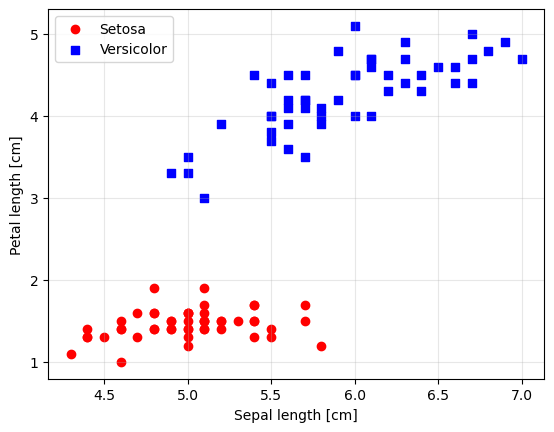

In [31]:
import matplotlib.pyplot as plt

plt.scatter(X[:50, 0], X[:50, 1], color = "red", marker = "o", label = "Setosa")
plt.scatter(X[50:, 0], X[50:, 1], color = "blue", marker = "s", label = "Versicolor")
plt.grid(alpha = 0.3)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()